In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-mahatyrov/statistics/conversion.csv')

In [5]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [6]:
df.xyz_campaign_id.unique()

array([ 916,  936, 1178])

In [7]:
df.Total_Conversion.unique()

array([ 2,  1,  4,  3,  0,  5, 28, 13, 11, 24, 60,  7, 40, 26,  6, 20,  9,
       23, 22, 31, 10,  8, 17, 15, 16, 19, 38, 12, 14, 21, 18, 30])

In [8]:
#Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное 
#объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. 
#Выберите верные утверждения:

In [9]:
fb_campaign = df.groupby('fb_campaign_id', as_index=False).agg({'Impressions':'sum'})

In [10]:
fb_campaign.Impressions = np.log(fb_campaign.Impressions)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


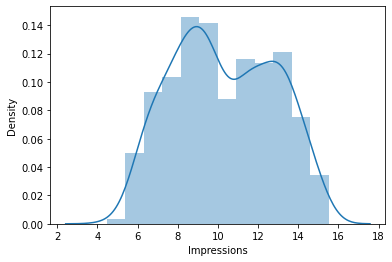

In [11]:
sns.distplot(fb_campaign.Impressions )

In [12]:
df_ctr = df.assign(ctr= df.Clicks/df.Impressions * 100)

In [14]:
df_ctr.sort_values('ctr',ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.105932
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.084495
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.061031
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.056529
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.053079
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


In [23]:
df_ctr_graph = df_ctr.query('xyz_campaign_id == 916')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


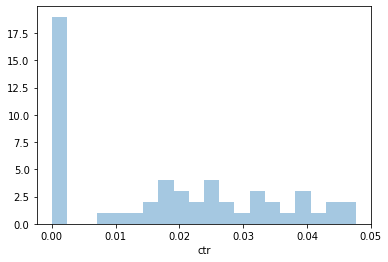

In [24]:
sns.distplot(df_ctr_graph.ctr, bins=20, kde=False)

In [28]:
df_cpc = df.assign(cpc = df.Spent / df.Clicks).dropna()

In [37]:
df_cpc.cpc.describe()
1.644364 - 1.390000

0.25436400000000003

In [39]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [48]:
df_cpc

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.910000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,1.290000
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0,1.590000
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,1.471926


In [59]:
df_cpc_male = df_cpc.query('gender == "M"').dropna()
df_cpc_female = df_cpc.query('gender == "F"').dropna()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


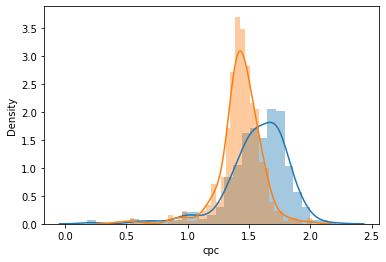

In [64]:
sns.distplot(df_cpc_male.cpc)
sns.distplot(df_cpc_female.cpc)

In [70]:
df_cr = df.assign(cr = df.Approved_Conversion / df.Clicks * 100).dropna()

In [71]:
df_cr.query('ad_id == 1121814 ')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cr
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,3.087886
